# 데이터 분석 II 실습
1. 데이터 분석하기
    - kaggle의 날씨 데이터
    - 데이터 분석
    - 어떤 인사이트를 얻을 수 있을까? 어떤 서비스를 개발할 수 있을까?
    
2. 일상생활에서 겪을 만한 사건을 시나리오로 설정하고 데이터 분석
    1. 질문하기
    2. 작은 단위에서 큰 단위로
    3. 여러가지 분석과 결과 분석하기
    4. 현장을 이해하고 방향 만들기
    5. 스토리 만들기
    6. 피드백 준비하기

### 1. 데이터 분석하기

In [90]:
import pandas as pd

#데이터셋 로드
df = pd.read_csv('weather_classification_data.csv')

#데이터 헤드 확인
print('데이터의 처음 몇 줄을 출력하여 구조 확인')
print(df.head())

# 데이터의 각 컬럼에 대한 정보 확인
print('#'*70)
print('데이터의 각 컬럼에 대한 정보 확인')
print(df.info())

데이터의 처음 몇 줄을 출력하여 구조 확인
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rain

In [91]:
# 결측치 확인
print('\n Missing value:\n',df.isnull().sum())


 Missing value:
 Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [92]:
# 이상치 확인
# IQR 방법
# IQR 방법을 사용한 이상치 탐지 함수
# 수치형 데이터 선택

def detect_outliers_iqr(data):
    outliers = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


# 수치형 데이터만 선택
numeric_df =df[df.select_dtypes(include=['float64', 'int64']).columns]
# 이상치 탐지
outliers_iqr = detect_outliers_iqr(numeric_df)
for column, outliers in outliers_iqr.items():
    print(f"{column} 이상치:")
    print(outliers)
    print()

Temperature 이상치:
       Temperature  Humidity  Wind Speed  Precipitation (%)  \
210           78.0        81         8.0               78.0   
228           73.0        82        47.0              107.0   
535           80.0        76         3.0               93.0   
709           74.0       101        18.0               76.0   
730           76.0        91        13.5               82.0   
...            ...       ...         ...                ...   
12752         90.0        83        15.0               98.0   
12814         72.0        88        12.0               83.0   
12878         95.0        96         1.0               84.0   
13065         97.0        95         7.5               79.0   
13108         81.0        81        10.5               96.0   

       Atmospheric Pressure  UV Index  Visibility (km)  
210                 1010.19         1              4.5  
228                 1002.73         0              0.5  
535                 1014.26        13              3.0 

In [93]:


# 이상치 제거
def remove_outliers_iqr(data):
    # 수치형 데이터만 선택
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# 이상치 제거
df_no_outliers = remove_outliers_iqr(df)

# 결과 확인
print("이상치 제거 후 데이터셋:")
print(df_no_outliers.describe())

이상치 제거 후 데이터셋:
        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  11586.000000  11586.000000  11586.000000       11586.000000   
mean      19.064733     69.373727      9.186561          51.704212   
std       15.839684     19.383644      5.590998          31.987402   
min      -24.000000     20.000000      0.000000           0.000000   
25%        8.000000     59.000000      5.000000          18.000000   
50%       22.000000     70.000000      8.500000          56.000000   
75%       30.000000     84.000000     13.500000          80.000000   
max       71.000000    109.000000     26.000000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count           11586.00000  11586.000000     11586.000000  
mean             1006.26002      3.521146         5.113931  
std                12.92744      3.480649         2.600581  
min               962.88000      0.000000         0.000000  
25%               995.83000      1.000000        

In [94]:
# 처리 전후 데이터 크기 비교
print(f"처리 전 데이터 크기: {df.shape}")
print(f"처리 후 데이터 크기: {df_no_outliers.shape}")

처리 전 데이터 크기: (13200, 11)
처리 후 데이터 크기: (11586, 11)


In [95]:
from sklearn.preprocessing import MinMaxScaler
#수치형 데이터
numeric_columns = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df_no_outliers[numeric_columns]

# MinMaxScaler 적용
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_data)

# 스케일링된 데이터프레임 생성
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# 스케일링된 데이터를 원래 데이터프레임에 덮어씌우기
df_no_outliers[numeric_columns] = scaled_df

# 결과 확인
print(df_no_outliers.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0     0.400000  0.595506    0.365385           0.752294  partly cloudy   
1     0.663158  0.853933    0.326923           0.651376  partly cloudy   
2     0.568421  0.494382    0.269231           0.146789          clear   
3     0.652632  0.707865    0.057692           0.752294          clear   
4     0.536842  0.606742    0.653846           0.605505       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0              0.555375  0.153846  Winter         0.250000    inland   
1              0.562442  0.538462  Spring         0.714286    inland   
2              0.646895  0.384615  Spring         0.392857  mountain   
3              0.734129  0.538462  Spring         0.071429   coastal   
4              0.321942  0.076923  Winter         0.178571  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  


In [96]:
# 원래 데이터프레임에서 수치형 컬럼만 선택하여 스케일링된 값으로 대체
df_copy = df.copy()
df[numeric_columns] = df_no_outliers[numeric_columns]

# 결과 확인
print(df.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0     0.400000  0.595506    0.365385           0.752294  partly cloudy   
1     0.663158  0.853933    0.326923           0.651376  partly cloudy   
2     0.568421  0.494382    0.269231           0.146789          clear   
3     0.652632  0.707865    0.057692           0.752294          clear   
4     0.536842  0.606742    0.653846           0.605505       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0              0.555375  0.153846  Winter         0.250000    inland   
1              0.562442  0.538462  Spring         0.714286    inland   
2              0.646895  0.384615  Spring         0.392857  mountain   
3              0.734129  0.538462  Spring         0.071429   coastal   
4              0.321942  0.076923  Winter         0.178571  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  


#### 1-1. 계절별 기상 조건 변화

In [97]:
import matplotlib.pyplot as plt

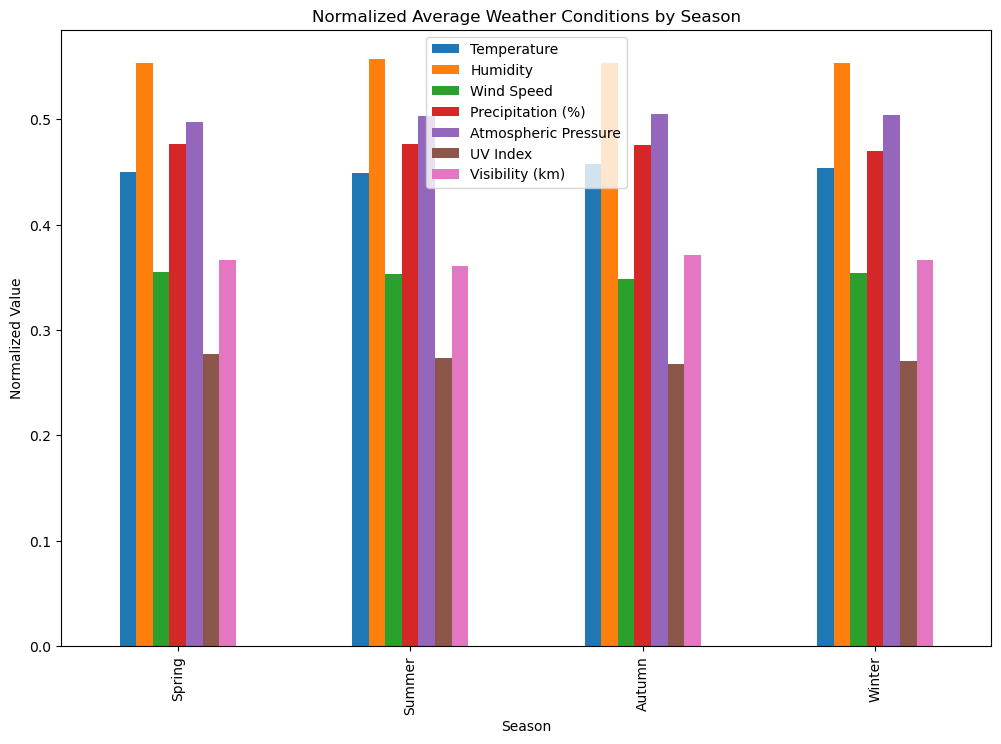

In [98]:
# 계절 순서 지정
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
# 계절별 기상 조건 평균 계산
seasonal_avg_normalized = df.groupby('Season')[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']].mean().reindex(season_order)

# 시각화
seasonal_avg_normalized.plot(kind='bar', figsize=(12, 8))
plt.title('Normalized Average Weather Conditions by Season')
plt.ylabel('Normalized Value')
plt.show()

#### 1-2. 강수 확률이 높은 날과 낮은 날의 자외선 지수 비교


High Precipitation UV Index Mean: 3.1850891904253698
Low Precipitation UV Index Mean: 4.816292726998946


Text(0.5, 1.0, 'Low Precipitation UV Index Distribution')

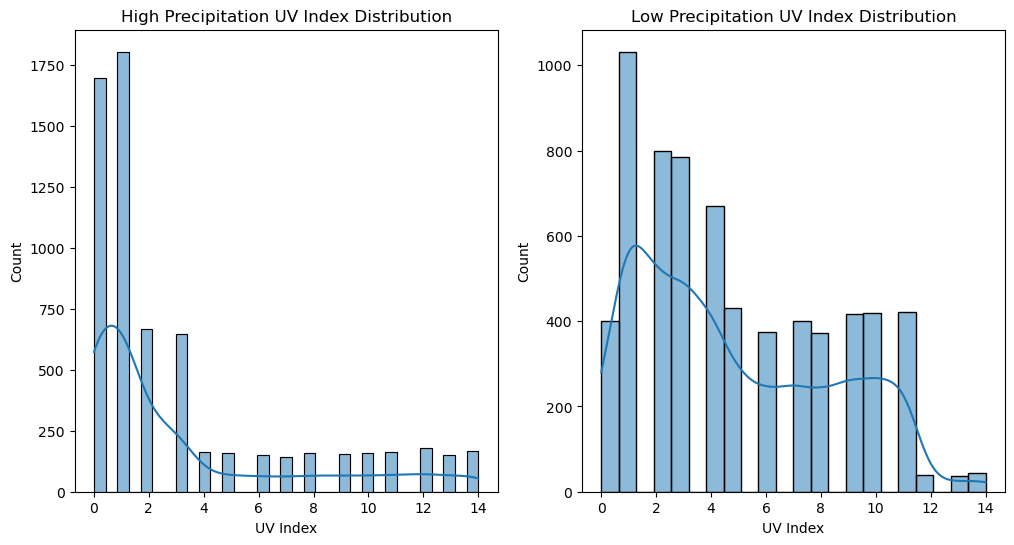

In [99]:
import seaborn as sns
df = df_copy


# 강수 확률 기준으로 그룹 나누기
median_precip = df['Precipitation (%)'].median()
high_precip = df[df['Precipitation (%)'] > median_precip]['UV Index']
low_precip = df[df['Precipitation (%)'] <= median_precip]['UV Index']

# 두 그룹의 자외선 지수 평균 비교
mean_high_precip_uv = high_precip.mean()
mean_low_precip_uv = low_precip.mean()

print(f"High Precipitation UV Index Mean: {mean_high_precip_uv}")
print(f"Low Precipitation UV Index Mean: {mean_low_precip_uv}")

# 히스토그램으로 데이터 분포 확인
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(high_precip, kde=True)
plt.title('High Precipitation UV Index Distribution')

plt.subplot(1, 2, 2)
sns.histplot(low_precip, kde=True)
plt.title('Low Precipitation UV Index Distribution')

### 2. 일상 생활에서 겪을 만한 사건을 시나리오로 설정하고 데이터 분석
1. 질문하기

목표: 자외선 지수가 높은 날과 낮은 날의 기상 조건을 분석하여 야외 활동 계획에 도움을 주기 위함.

주요 질문:

	•	자외선 지수가 높은 날과 낮은 날의 기상 조건 차이는 무엇인가?
	•	자외선 지수가 높은 날과 낮은 날의 강수 확률과 구름량의 차이는 무엇인가?
	•	자외선 지수가 높은 날에는 어떤 야외 활동이 적합한가?

2. 작은 단위에서 큰 단위로

개별 데이터 포인트 분석:

	•	자외선 지수가 높은 날과 낮은 날의 기온, 습도, 풍속, 강수 확률, 기압, 구름량 등의 평균 비교.
	•	자외선 지수가 높은 날과 낮은 날의 기상 조건 분포 확인.

통합적인 패턴 분석:

	•	자외선 지수에 따라 주요 기상 변수들의 패턴 분석.
	•	자외선 지수가 높은 날의 조건을 분석하여 야외 활동 계획에 반영.


3. 여러가지 분석과 결과 분석하기

자외선 지수가 높은 날과 낮은 날의 기상 조건 비교:

High UV Index 평균 기상 조건:
Temperature             0.539576
Humidity                0.462685
Wind Speed              0.307117
Precipitation (%)       0.334495
Atmospheric Pressure    0.586061
Visibility (km)         0.458439
dtype: float64

Low UV Index 평균 기상 조건:
Temperature             0.374555
Humidity                0.636972
Wind Speed              0.395152
Precipitation (%)       0.600167
Atmospheric Pressure    0.427466
Visibility (km)         0.283014
dtype: float64


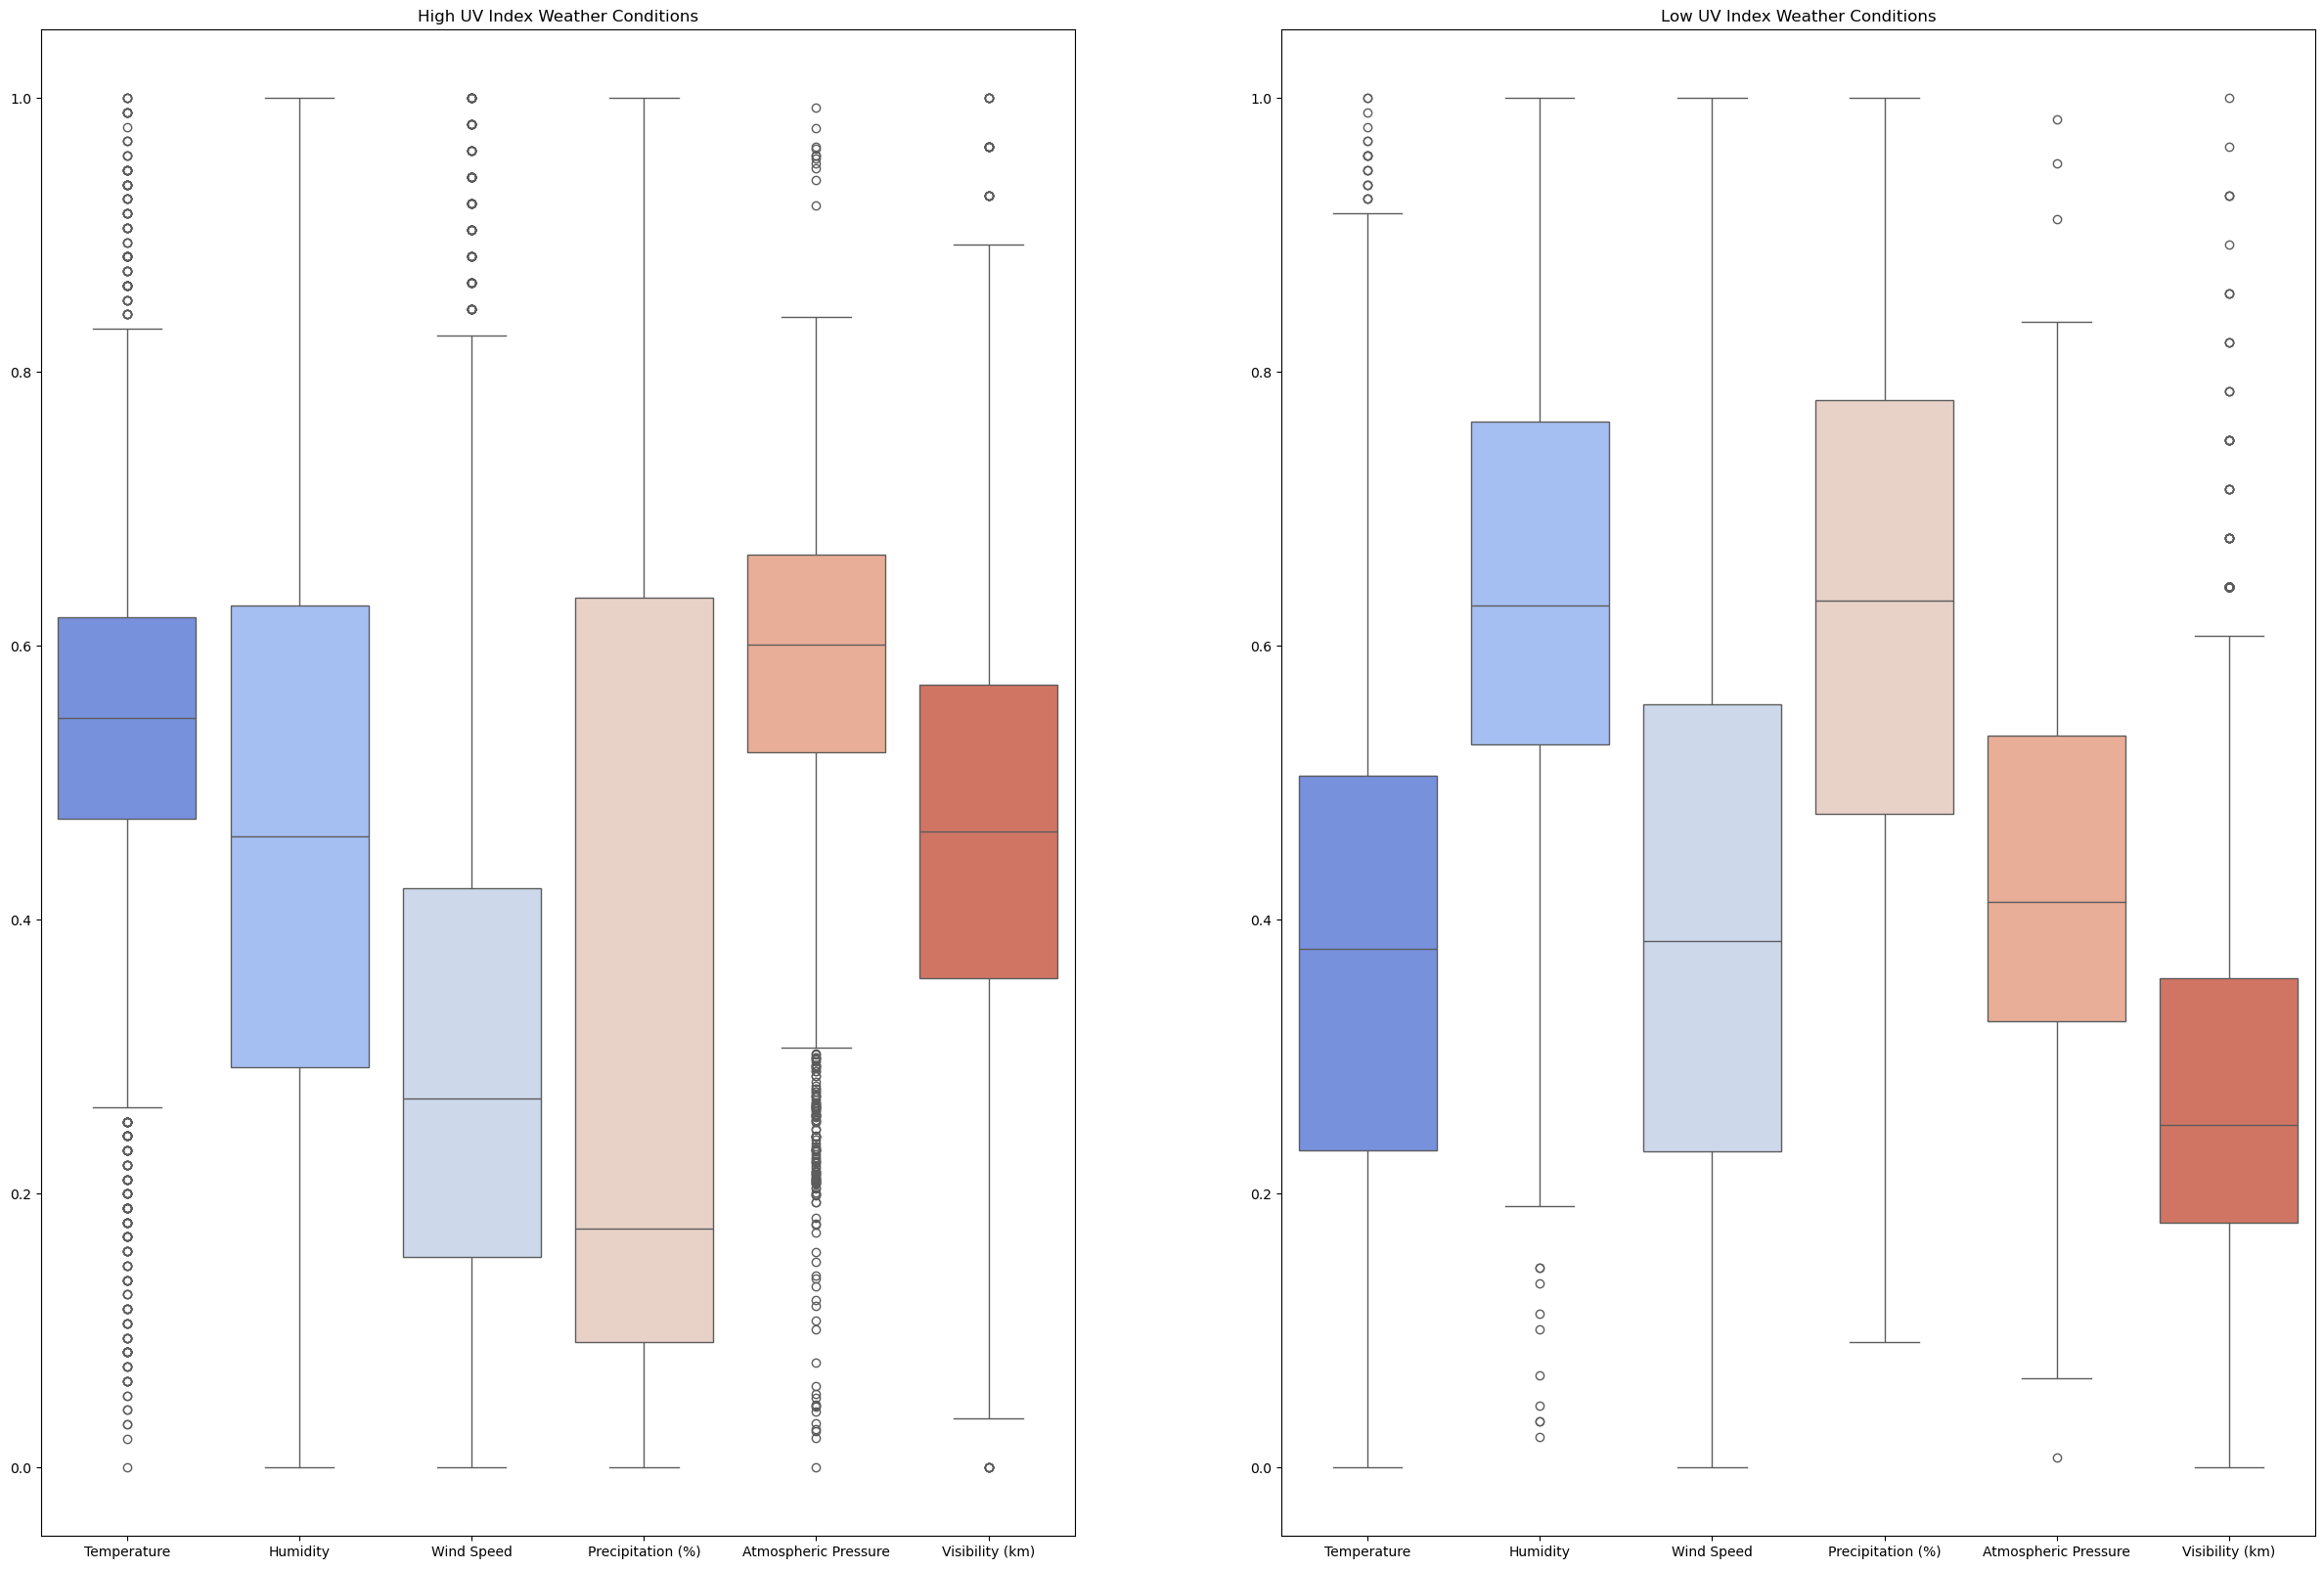

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_copy = df
df[numeric_columns] = df_no_outliers[numeric_columns]

# 자외선 지수 기준으로 그룹 나누기
median_uv = df['UV Index'].median()
high_uv = df[df['UV Index'] > median_uv]
low_uv = df[df['UV Index'] <= median_uv]

# 주요 기상 변수들의 평균 비교
mean_high_uv = high_uv[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'Visibility (km)']].mean()
mean_low_uv = low_uv[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'Visibility (km)']].mean()

print("High UV Index 평균 기상 조건:")
print(mean_high_uv)
print("\nLow UV Index 평균 기상 조건:")
print(mean_low_uv)

# 기상 변수들의 분포 비교
plt.figure(figsize=(30, 20))

plt.subplot(1, 2, 1)
sns.boxplot(data=high_uv[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'Visibility (km)']], palette='coolwarm')
plt.title('High UV Index Weather Conditions')

plt.subplot(1, 2, 2)
sns.boxplot(data=low_uv[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'Visibility (km)']], palette='coolwarm')
plt.title('Low UV Index Weather Conditions')

plt.show()

5. 스토리 만들기

스토리:
“저는 자외선 지수가 높은 날과 낮은 날의 기상 조건을 분석하여 야외 활동 계획을 세우고자 합니다. 데이터 분석 결과, 자외선 지수가 높은 날은 기온이 높고, 강수 확률이 낮으며, 구름이 적은 날이 많았습니다. 반면, 자외선 지수가 낮은 날은 기온이 낮고, 강수 확률이 높으며, 구름이 많은 날이 많았습니다. 따라서 자외선 지수가 높은 날에는 햇볕에 대한 대비를 철저히 하고, 자외선 지수가 낮은 날에는 비에 대한 대비를 철저히 해야 한다는 결론을 얻었습니다.”

6. 피드백 준비하기

목표: 야외 활동 후 경험을 토대로 피드백을 수집하여 다음 계획에 반영.

피드백 질문:

	1.	자외선 지수가 높은 날과 낮은 날의 기상 조건이 실제로 예상대로였는가?
	2.	자외선 지수가 높은 날에 준비한 보호장비가 효과적이었는가?
	3.	자외선 지수가 낮은 날에 준비한 비 대비 장비가 효과적이었는가?
	4.	다음 활동을 위해 개선할 점은 무엇인가?

피드백 분석 및 개선점:

	•	피드백을 통해 예상과 실제 경험 간의 차이를 파악하고, 데이터 분석의 정확성을 평가.
	•	경험을 토대로 기상 조건 예측 정확도를 높이기 위한 추가 분석 수행.
	•	다음 야외 활동 계획 시 더 나은 대비책을 세우기 위해 피드백을 반영.